In [57]:
import pandas as pd
# data path
path = "/data/dropbox/dialloa/test/"
iris = pd.read_csv(path+"iris.csv")

In [58]:
kdata = iris.iloc[:,1:-1]
target = iris.iloc[:,-1]

In [59]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
%matplotlib inline


In [60]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
scaler = MinMaxScaler()
kdata_scaled=scaler.fit_transform(kdata)

le =  LabelEncoder()
target_enc = le.fit_transform(target)


In [89]:
kmeans = KMeans(n_clusters = 15)
kmeans.fit(kdata_scaled)

# Centroids and labels
centroids = kmeans.cluster_centers_
labels = kmeans.labels_


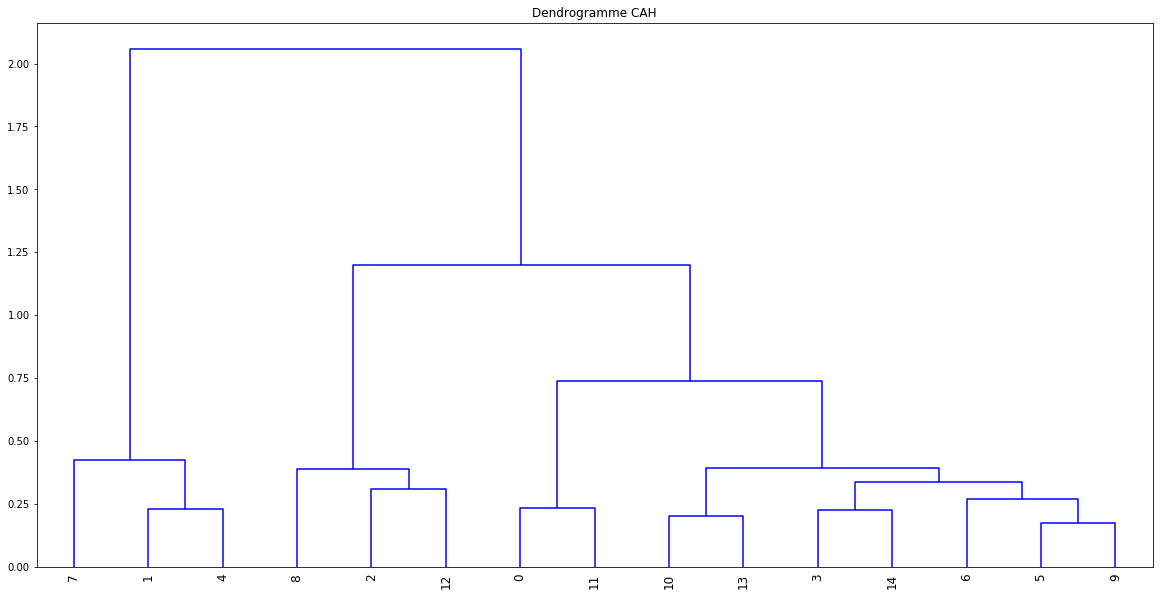

In [90]:
plt.figure(figsize=(20, 10))

# Génération de la matrice des liens
Z = linkage(centroids, method = 'ward', metric = 'euclidean')
# Affichage du dendrogramme
plt.title("Dendrogramme CAH")
dendrogram(Z, leaf_rotation = 90., color_threshold = 0)
plt.show()


In [91]:
# Initialisation du classificateur CAH pour 3 clusters
cah_cluster = AgglomerativeClustering(n_clusters = 3)
# Apprentissage des données 
cah_cluster.fit(centroids)
# Calcul des labels du data set
labels = cah_cluster.labels_


In [112]:
centroids2 = []
	
for i in range(0,3):
    moy_cluster = np.mean(kmeans.cluster_centers_, axis=0)  
# cluster_centers_ ndarray of shape (n_clusters, n_features)
    centroids2.append(moy_cluster)
    
centroids2 = np.array(centroids2)

In [113]:
# Algorithme de K-means
kmeans2 = KMeans(n_clusters = 3,init=centroids2 )
kmeans2.fit(kdata_scaled)

# Centroids and labels
centroids2 = kmeans2.cluster_centers_
labels2 = kmeans2.labels_

/opt/conda/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  This is separate from the ipykernel package so we can avoid doing imports until


In [114]:
df_classes = pd.DataFrame({'Clustering classe':labels2,"Real classe":target})

ct = pd.crosstab(df_classes['Clustering classe'],df_classes['Real classe'])
print(ct) 


Real classe        Iris-setosa  Iris-versicolor  Iris-virginica
Clustering classe                                              
0                            0               46              50
1                           18                4               0
2                           32                0               0


In [102]:
iris["predit"] = labels2